In [ ]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Region,NA_Sales)
# Standardizing categorical values(Country)
#Renaming Columns
#Handling Outliers(Global Sales)

#Create a Bar Chart('National Sales by Region and Country)
#Create Box Plot('Global Sales By Platform)


In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('VideoGamesSales.csv')
# df=df[df.duplicated()]
df=df.drop_duplicates()
df['Region']=df['Region'].fillna('North')
df['NA_Sales']=df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
Average_Sales=df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df.head(3)
df.tail(3)

Rank                                       Name Platform  Year Month  \
5906  5892  Harry Potter and the Order of the Phoenix     X360  2017   Nov   
5907  5893                  Skylanders: SuperChargers      PS4  2017   Dec   
5908  5894               Macross Digital Mission VF-X       PS  2017   Jan   

           Genre           Publisher    Country    City            State  \
5906      Action     Electronic Arts  Australia  Sydney  New South Wales   
5907      Action          Activision  Australia  Sydney  New South Wales   
5908  Simulation  Namco Bandai Games  Australia  Sydney  New South Wales   

     Region  National Sales  Global Sales  National Profit  Global Profit  
5906   West            0.24           0.3            0.072           0.09  
5907   West            0.17           0.3            0.051           0.09  
5908   West            0.00           0.3            0.000           0.09

In [3]:
from ydata_profiling import ProfileReport

In [5]:
profile=ProfileReport(df, title= 'Summary Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 198.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

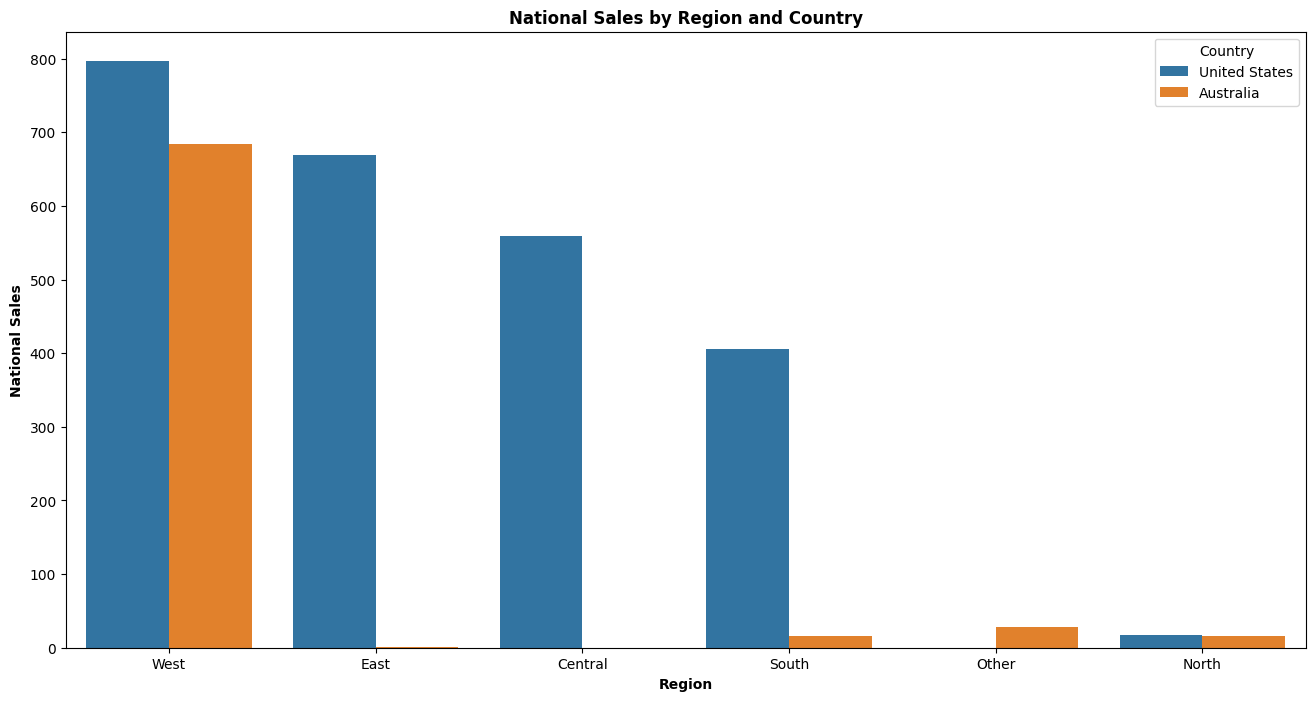

In [25]:
#create a bar Chart
National_Sales = df.groupby(['Region', 'Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country')
plt.title('National Sales by Region and Country', fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('National Sales', fontweight='bold')
plt.show()

In [27]:
National_Sales = df.groupby(['Region', 'Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales 

Region        Country  National Sales
9     West  United States          796.65
8     West      Australia          683.62
2     East  United States          668.92
0  Central  United States          558.67
7    South  United States          405.99
5    Other      Australia           28.21
4    North  United States           17.69
6    South      Australia           16.30
3    North      Australia           15.24
1     East      Australia            1.35

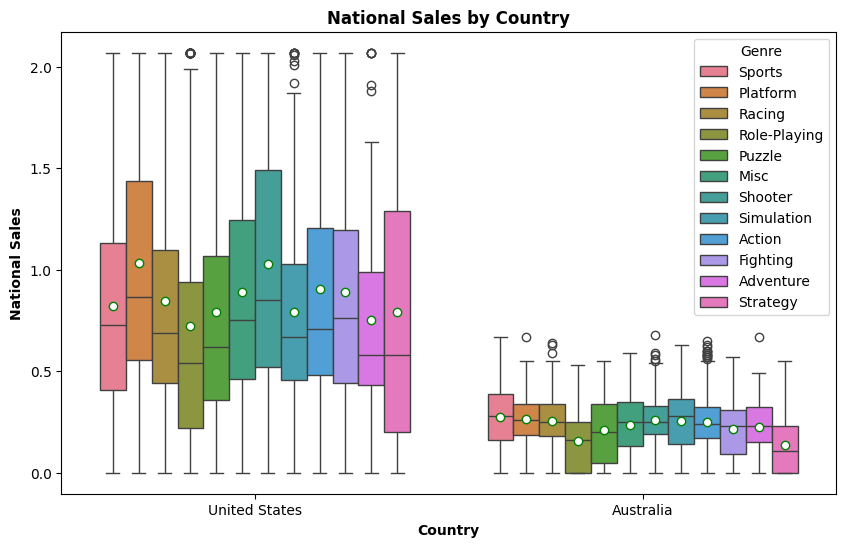

In [21]:
#Create Box Plot
# ,meanprops={"marker":"o"
#                                                                                   ,"markerfacecolor":"white"
#                                                                                   ,"markersize":"3"
#                                                                                   ,"markeredgecolor":"green"}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

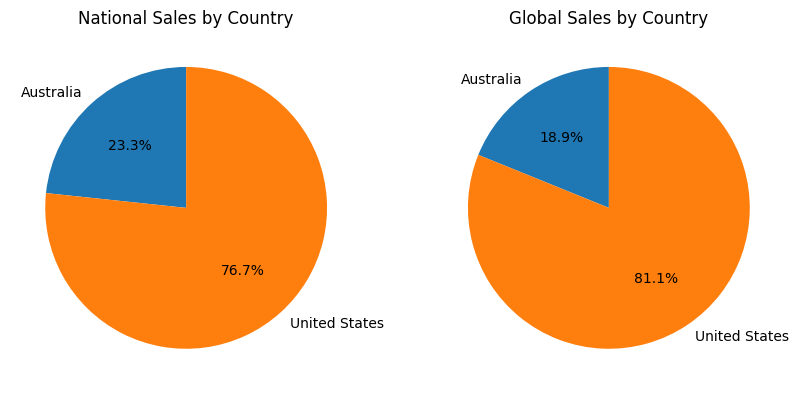

In [22]:
#create a pie Chart
Sales=df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()



In [29]:
Sales

Country  National Sales  Global Sales
0      Australia          744.72       1468.25
1  United States         2447.92       6315.68

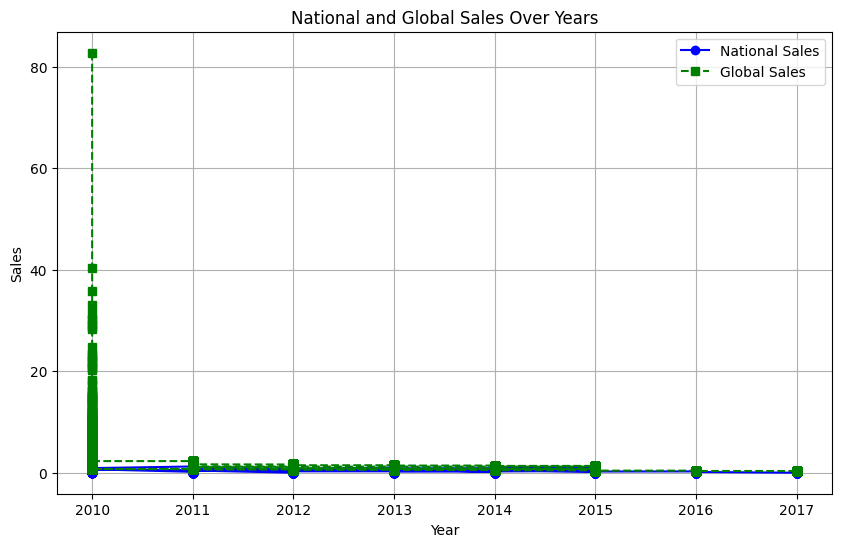

In [31]:
# Create a line chart
plt.figure(figsize=(10, 6))

# Line for National Sales
plt.plot(df['Year'], df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')

# Line for Global Sales
plt.plot(df['Year'], df['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()